In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
def psycometrique(data_tuple,var2):
    result, mean_used = data_tuple
    true_array_mean_used = []
    true_array_result = []
    block_size = 1000           
    big_blocs = 41           # nb de valeurs de S2 par courbe
    size_one_block = block_size * big_blocs  

    for j in range(len(var2)):
        array_mean_result = []
        array_mean_used = []
        for i in range(0, size_one_block, block_size):
            # bloc de result
            block_r = result[size_one_block*j + i : size_one_block*j + i+block_size]
            mean_r = sum(block_r) / len(block_r)
            array_mean_result.append(mean_r)

            # bloc de mean_used
            block_m = mean_used[size_one_block*j + i : size_one_block*j + i+block_size]
            mean_m = sum(block_m) / len(block_m)
            array_mean_used.append(mean_m)

        true_array_result.append(array_mean_result)
        true_array_mean_used.append(array_mean_used)
    return true_array_result, true_array_mean_used


def data_var2(file_path):
    df = pd.read_csv(file_path)
    var2 = df['S2_std'].to_numpy()
    var2 = pd.unique(var2)      
    return list(var2)           


def ploter(mean_used_all, mean_res_all, var, var1=0.2):
    """
    Graphique unique : psychometric curves (x_star search)
    """

    seuil = 0.5
    x_stars = []

    fig, ax = plt.subplots(figsize=(8, 6))

    # ==========================================
    # ---------- Courbes psychométriques -------
    # ==========================================
    print("=== Points d'intersection avec P = 0.5 ===")

    for idx, (x_vals, y_vals) in enumerate(zip(mean_used_all, mean_res_all)):

        # tracer la courbe
        line, = ax.plot(x_vals, y_vals, 'o-', label=f'var = {var[idx]}')
        color = line.get_color()

        # --- recherche du passage par 0.5 ---
        x_cross = None
        for x1, y1, x2, y2 in zip(x_vals[:-1], y_vals[:-1],
                                  x_vals[1:],  y_vals[1:]):
            if (y1 - seuil) * (y2 - seuil) <= 0 and y1 != y2:
                x_cross = x1 + (seuil - y1) * (x2 - x1) / (y2 - y1)
                break

        if x_cross is not None:
            ax.scatter([x_cross], [seuil], color=color, zorder=5)
            ax.text(x_cross, seuil + 0.03, f'{x_cross:.2f}',
                     color=color, ha='center', va='bottom', fontsize=8)
            print(f'Bloc {idx+1} : x = {x_cross:.3f}')
        else:
            print(f'Bloc {idx+1} : pas de croisement avec 0.5')

        x_stars.append(x_cross)

    ax.axhline(seuil, color='red', linestyle='--', linewidth=1.5,
                label='Chance level (0.5)')

    ax.set_xlabel('Mean S1 value')
    ax.set_ylabel('Mean decision (P[1])')
    ax.set_title('Psychometric Functions')
    ax.grid(True, alpha=0.3)
    ax.legend()

    plt.tight_layout()
    plt.show()

    slopes = slope_x(x_stars, var, var1)
    return x_stars, slopes


def reading_csv(file_path, inverser = False):
    df = pd.read_csv(file_path)
    if inverser : 
        mean_used = df['S1_val'].tolist()
    else:
        mean_used = df['S2_val'].tolist()
    result = df['Decision (S1>S2)'].tolist()
    data_tuple = (result, mean_used)  
    print(len(result))
    return data_tuple


def slope_x(x_star, var2, var1=0.2):
    slopes = []
    for x, v in zip(x_star, var2):
        if x is None:
            slopes.append(np.nan)   # ou ne rien ajouter, selon ce que tu veux
            # var_valid ne prend pas ce v si tu veux vraiment ignorer ce point
        else : 
            slopes.append(x / (v**2 + var1**2))

    return slopes


def main(file_path, inverser):
    print('test')
    
    data_tuple = reading_csv(file_path, inverser=inverser)
    var2 = data_var2(file_path)
    array_mean_result, array_mean_used = psycometrique(data_tuple, var2)
    x_stars, slopes = ploter(array_mean_used, array_mean_result, var2)
    print("x_stars :", x_stars)
    return slopes, x_stars


Processing file: C:\Users\gabri\Desktop\bayesian\test\answers\experiment_results-10.csv
test
41000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = -6.044


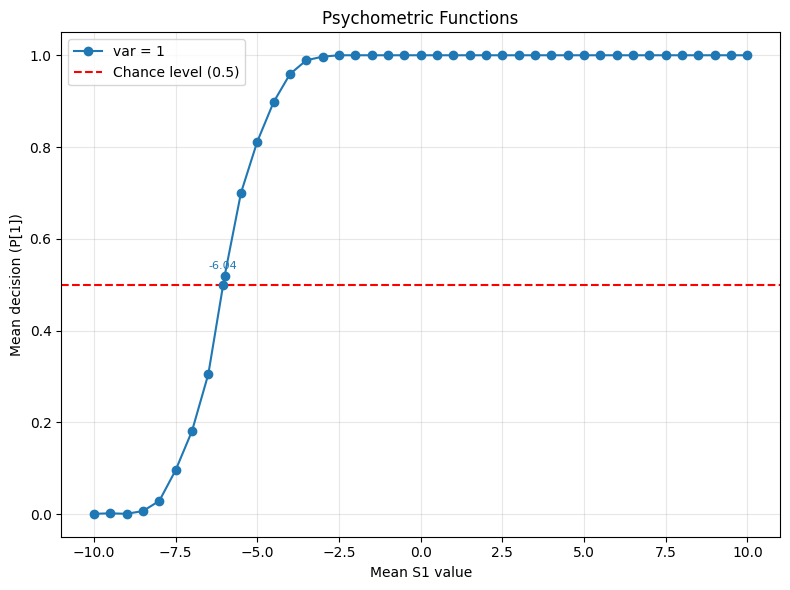

x_stars : [-6.044392523364486]

Processing file: C:\Users\gabri\Desktop\bayesian\test\answers\experiment_results-9.csv
test
41000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = -5.368


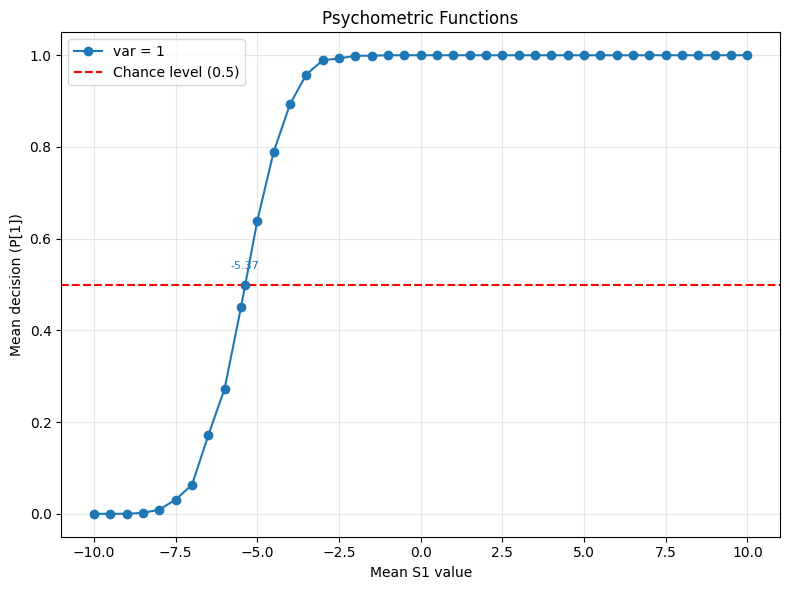

x_stars : [-5.367724867724868]

Processing file: C:\Users\gabri\Desktop\bayesian\test\answers\experiment_results-8.csv
test
41000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = -4.782


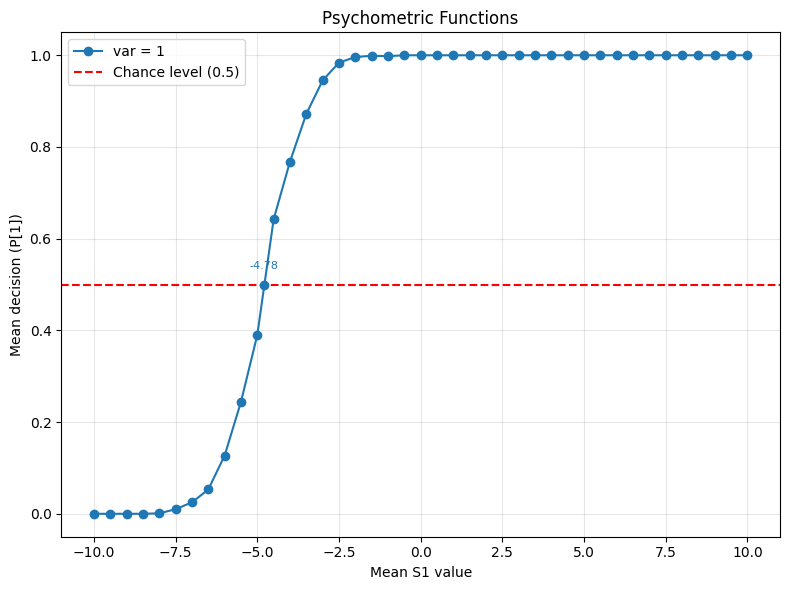

x_stars : [-4.781746031746032]

Processing file: C:\Users\gabri\Desktop\bayesian\test\answers\experiment_results-7.csv
test
41000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = -4.218


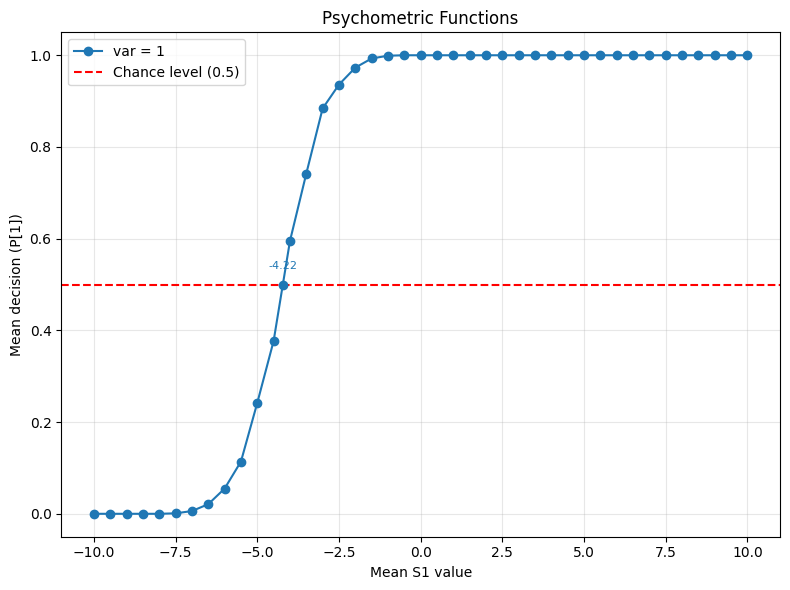

x_stars : [-4.217889908256881]

Processing file: C:\Users\gabri\Desktop\bayesian\test\answers\experiment_results-6.csv
test
41000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = -3.639


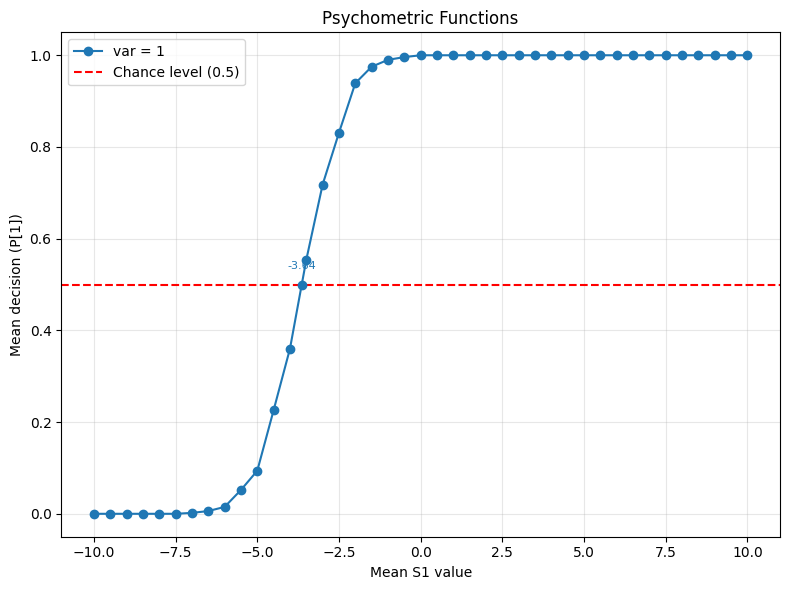

x_stars : [-3.6391752577319587]

Processing file: C:\Users\gabri\Desktop\bayesian\test\answers\experiment_results-5.csv
test
41000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = -3.009


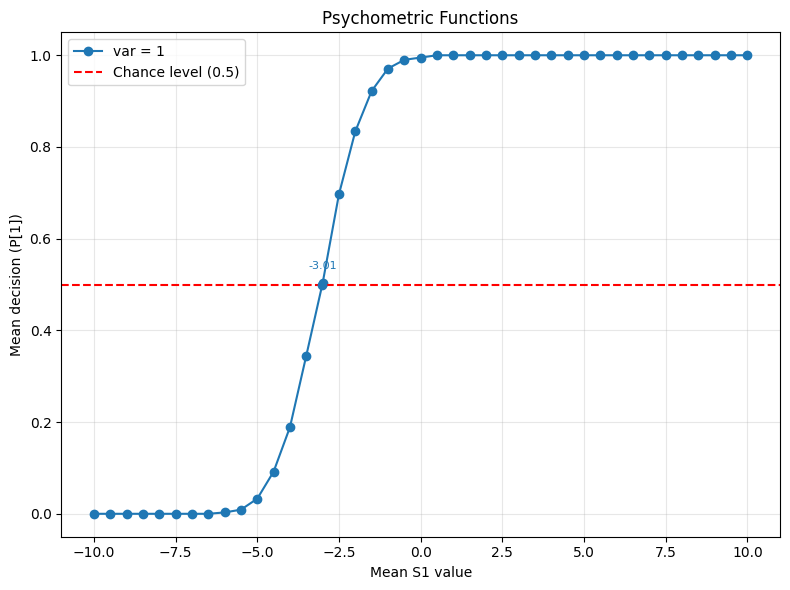

x_stars : [-3.009493670886076]

Processing file: C:\Users\gabri\Desktop\bayesian\test\answers\experiment_results-4.csv
test
41000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = -2.487


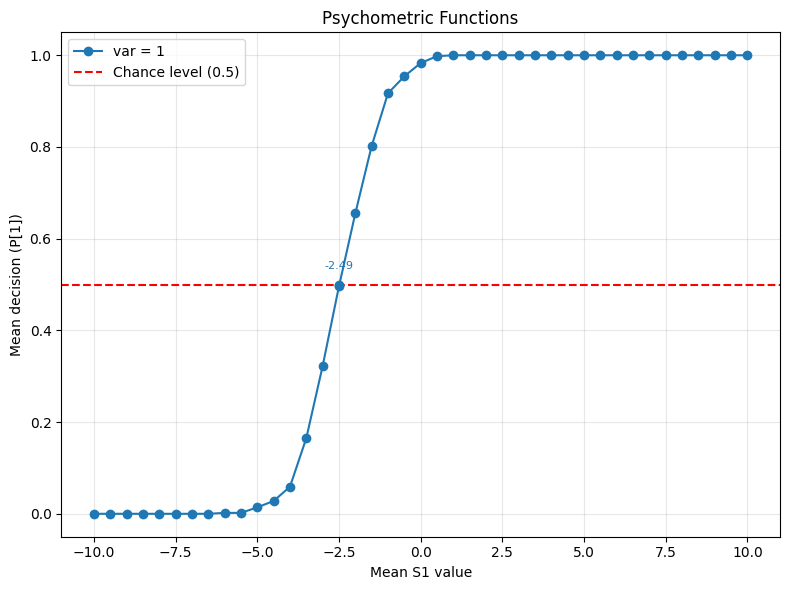

x_stars : [-2.4874213836477987]

Processing file: C:\Users\gabri\Desktop\bayesian\test\answers\experiment_results-3.csv
test
41000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = -1.859


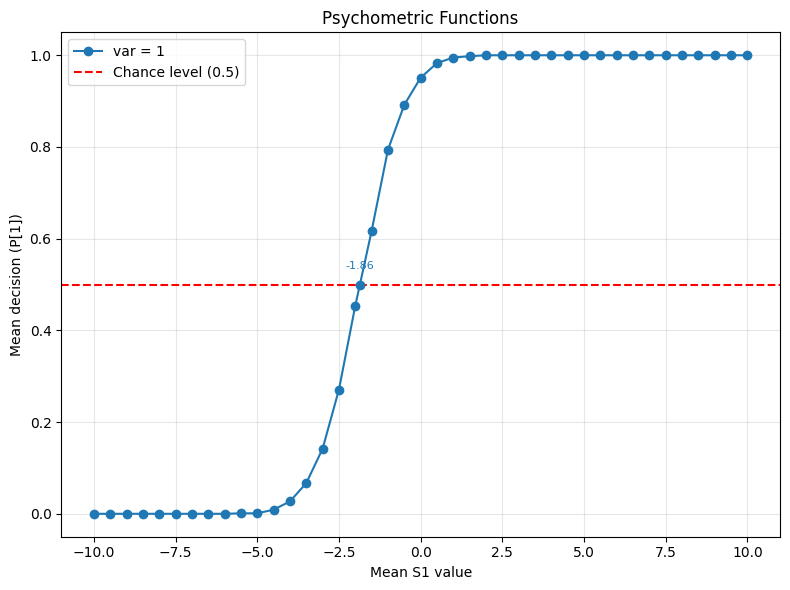

x_stars : [-1.8588957055214723]

Processing file: C:\Users\gabri\Desktop\bayesian\test\answers\experiment_results-2.csv
test
41000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = -1.235


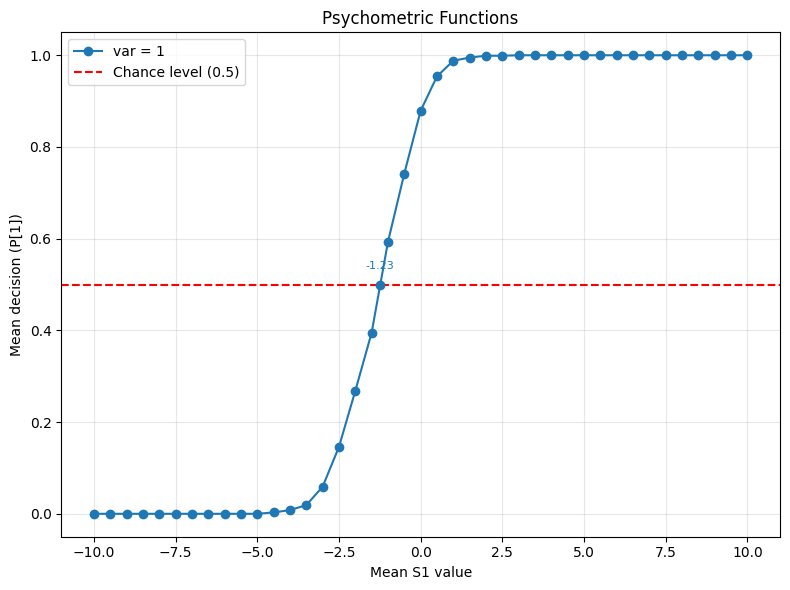

x_stars : [-1.2348484848484849]

Processing file: C:\Users\gabri\Desktop\bayesian\test\answers\experiment_results-1.csv
test
41000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = -0.723


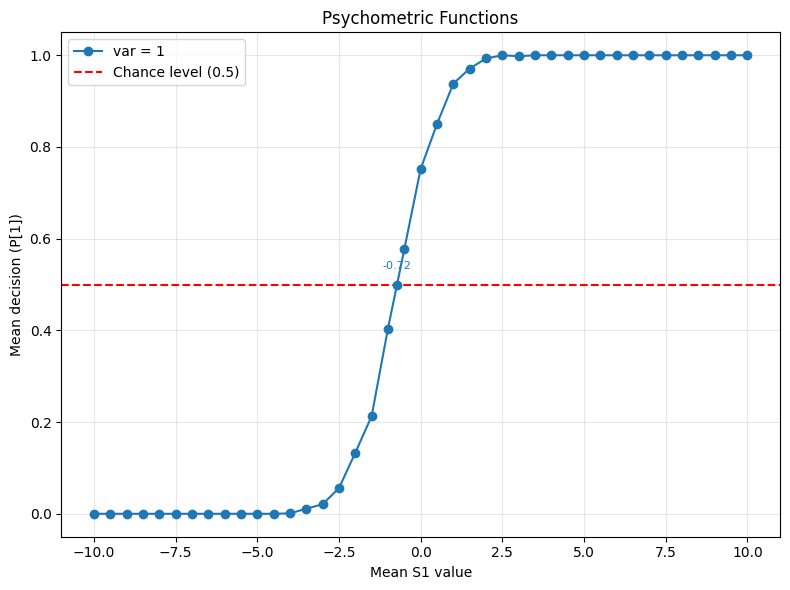

x_stars : [-0.722543352601156]

Processing file: C:\Users\gabri\Desktop\bayesian\test\answers\experiment_results0.csv
test
41000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = -0.099


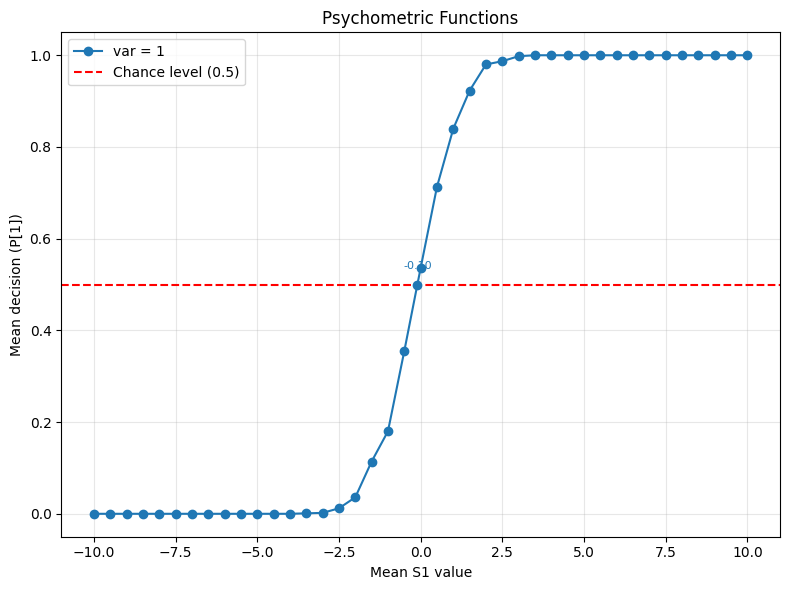

x_stars : [-0.09944751381215478]

Processing file: C:\Users\gabri\Desktop\bayesian\test\answers\experiment_results1.csv
test
41000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = 0.495


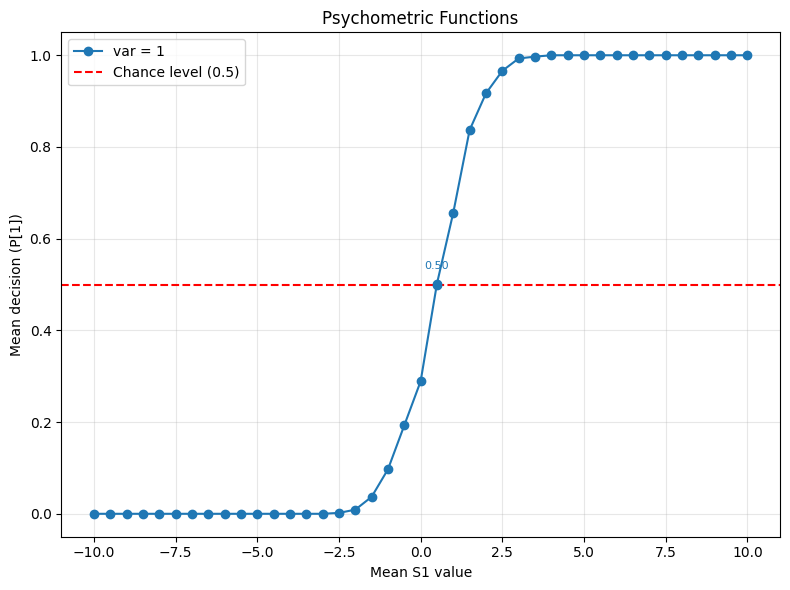

x_stars : [0.4953051643192488]

Processing file: C:\Users\gabri\Desktop\bayesian\test\answers\experiment_results2.csv
test
41000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = 1.101


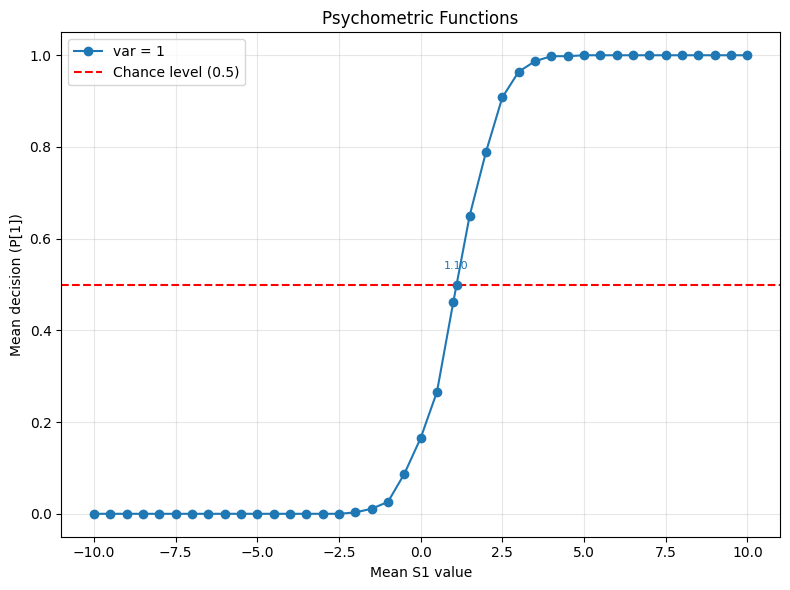

x_stars : [1.101063829787234]

Processing file: C:\Users\gabri\Desktop\bayesian\test\answers\experiment_results3.csv
test
41000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = 1.692


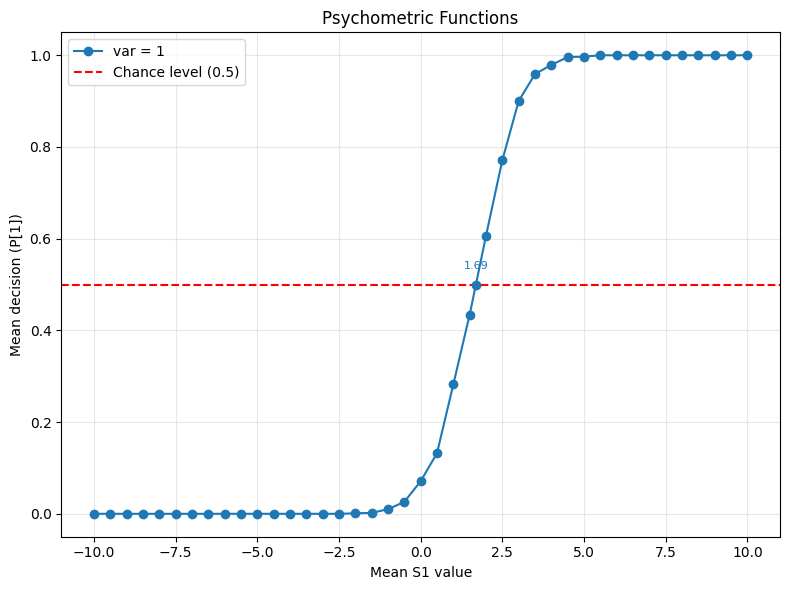

x_stars : [1.6918604651162792]

Processing file: C:\Users\gabri\Desktop\bayesian\test\answers\experiment_results4.csv
test
41000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = 2.246


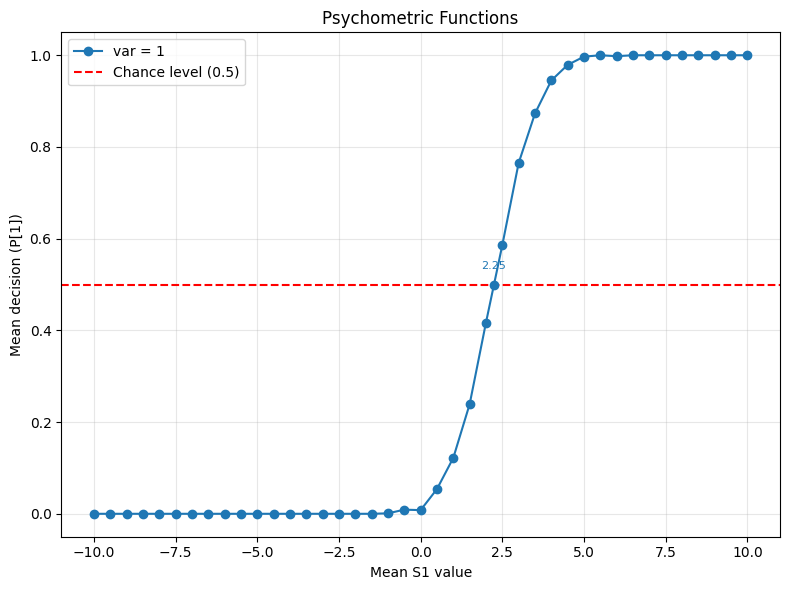

x_stars : [2.245562130177515]

Processing file: C:\Users\gabri\Desktop\bayesian\test\answers\experiment_results5.csv
test
41000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = 2.858


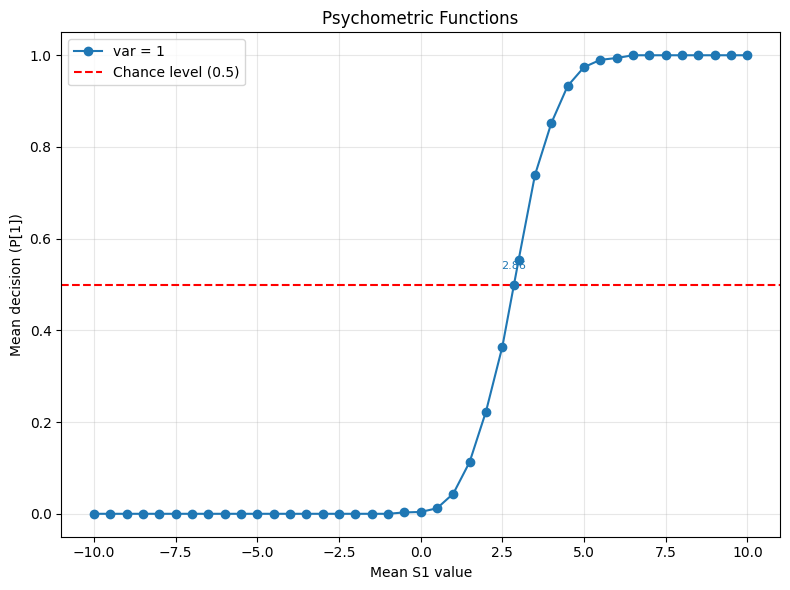

x_stars : [2.857894736842105]

Processing file: C:\Users\gabri\Desktop\bayesian\test\answers\experiment_results6.csv
test
41000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = 3.382


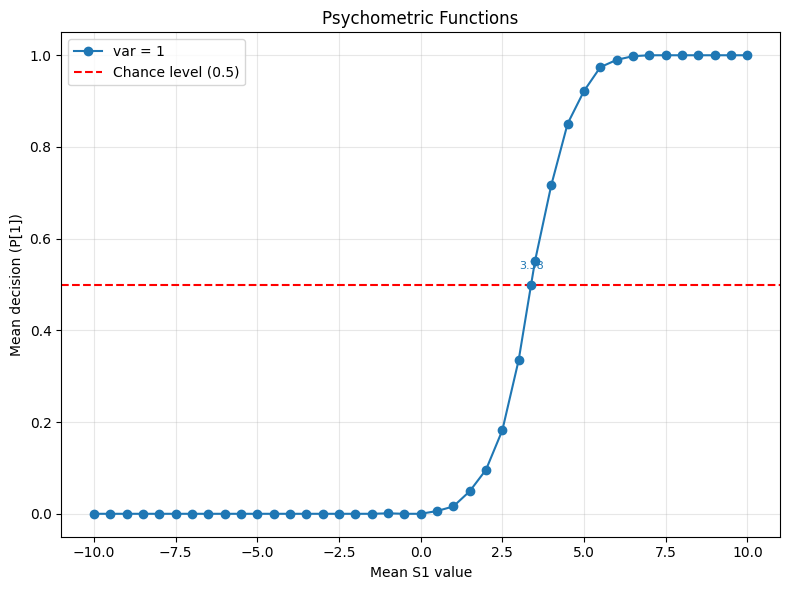

x_stars : [3.381944444444444]

Processing file: C:\Users\gabri\Desktop\bayesian\test\answers\experiment_results7.csv
test
41000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = 4.051


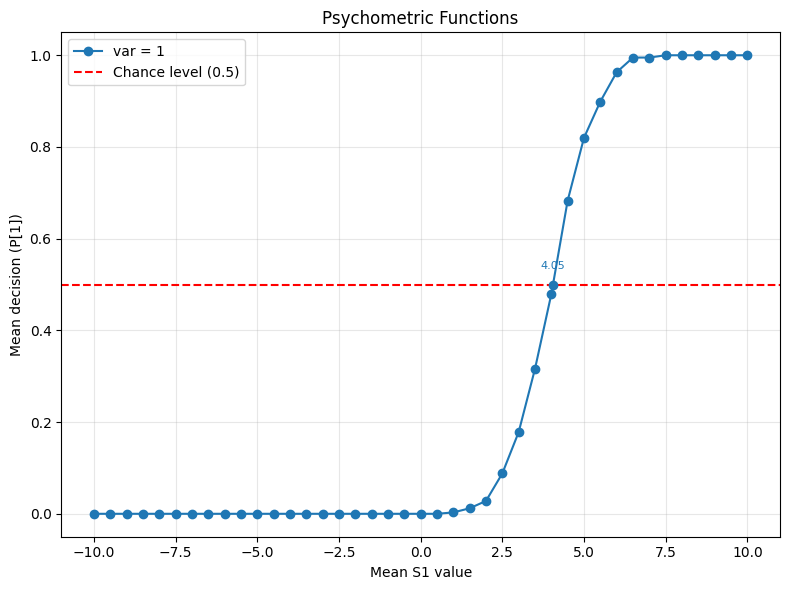

x_stars : [4.051470588235294]

Processing file: C:\Users\gabri\Desktop\bayesian\test\answers\experiment_results8.csv
test
41000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = 4.628


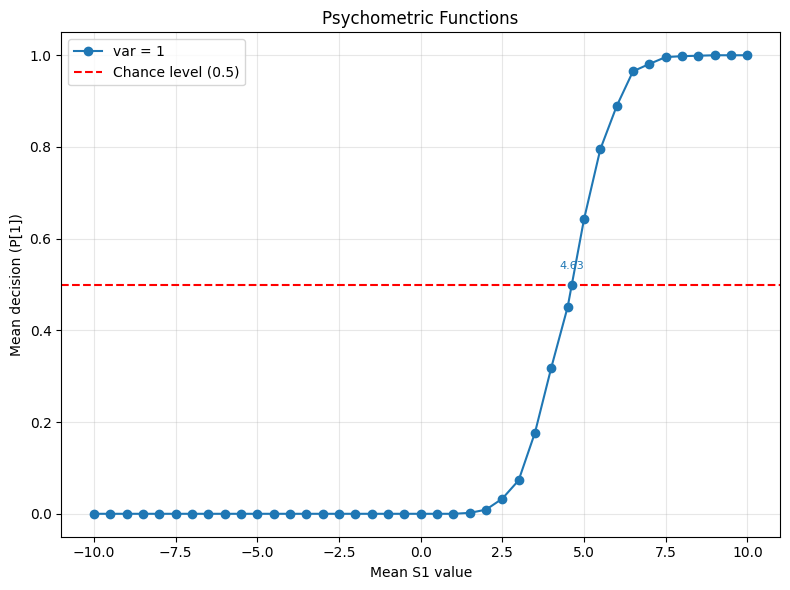

x_stars : [4.628272251308901]

Processing file: C:\Users\gabri\Desktop\bayesian\test\answers\experiment_results9.csv
test
41000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = 5.197


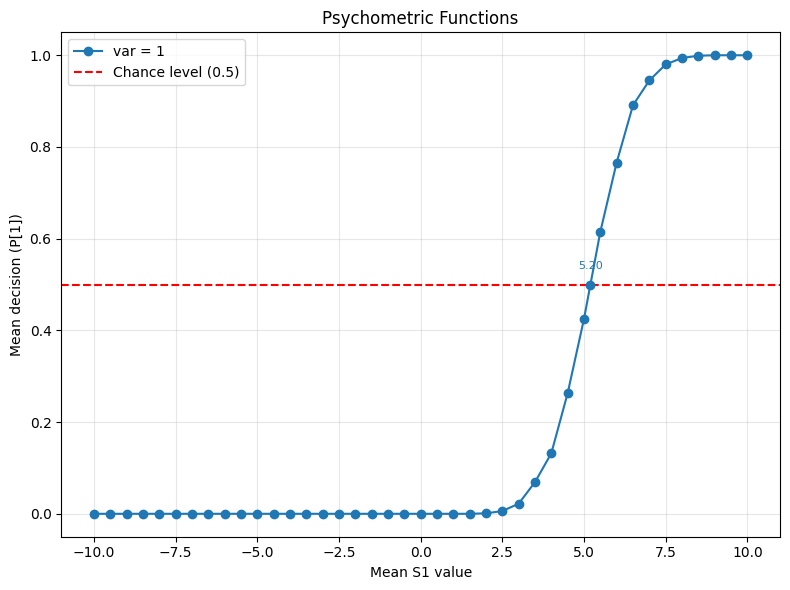

x_stars : [5.197368421052632]

Processing file: C:\Users\gabri\Desktop\bayesian\test\answers\experiment_results10.csv
test
41000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = 5.745


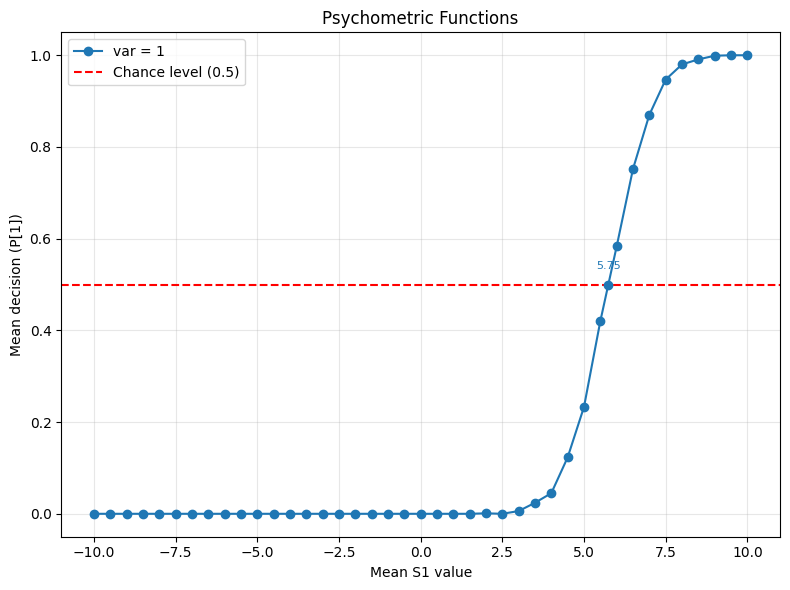

x_stars : [5.745398773006135]
Values : [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[[-6.044392523364486], [-5.367724867724868], [-4.781746031746032], [-4.217889908256881], [-3.6391752577319587], [-3.009493670886076], [-2.4874213836477987], [-1.8588957055214723], [-1.2348484848484849], [-0.722543352601156], [-0.09944751381215478], [0.4953051643192488], [1.101063829787234], [1.6918604651162792], [2.245562130177515], [2.857894736842105], [3.381944444444444], [4.051470588235294], [4.628272251308901], [5.197368421052632], [5.745398773006135]]


In [14]:
files = [f"C:\\Users\\gabri\\Desktop\\bayesian\\test\\answers\\experiment_results{i}.csv" for i in range(-10, 11)]

x_stars = []
vals = []
inverser = True
for i, file_path in enumerate(files):
    print("\nProcessing file:", file_path)
    slope, x_star = main(file_path=file_path , inverser=inverser)
    x_stars.append(x_star)
    val = file_path.split("eriment_results")[-1].split(".csv")[0]
    vals.append(int(val))
print("Values :", vals)
print(x_stars)
    
    


===== RESULTS =====
Slope a = [0.58842462]
Offset b = [-0.09844942]


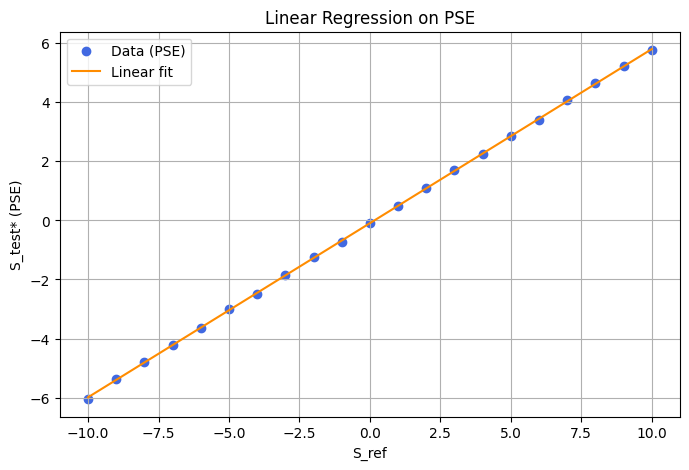

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# --- Tes données doivent déjà exister ---
# vals  : les valeurs de S_ref
# x_stars : les PSE trouvées pour chaque S_ref

X = np.array(vals).reshape(-1, 1)
y = np.array(x_stars)

# Régression linéaire
reg = LinearRegression().fit(X, y)

a = reg.coef_[0]       # pente
b = reg.intercept_     # offset

print("\n===== RESULTS =====")
print("Slope a =", a)
print("Offset b =", b)

# --- PLOT ---
plt.figure(figsize=(8,5))
plt.scatter(vals, x_stars, color="royalblue", label="Data (PSE)")
plt.plot(vals, reg.predict(X), color="darkorange", label="Linear fit")

plt.xlabel("S_ref")
plt.ylabel("S_test* (PSE)")
plt.title("Linear Regression on PSE")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
def compute_tau_p(alpha, tau_test, tau_ref):
    numerator = tau_test * tau_ref * (1 - alpha)
    denominator = alpha * tau_test - tau_ref
    return numerator / denominator

def compute_mu_p(tp, tref, ttest, beta):
    val = (tp * (ttest - tref)) / (ttest*(tref + tp))
    return beta / val
    

In [17]:
a = reg.coef_[0]       # pente
b = reg.intercept_  
ttest = 1/(0.2)**2
tref = 1
alpha = a[0]
beta = b[0]
tp = compute_tau_p(alpha, ttest, tref)
mean = compute_mu_p(tp, tref, ttest, beta)

In [18]:
print("tp =", tp)
print("std= " , (1/(tp**0.5)))
print("var", 1/tp)

tp = 0.7504684564078101
std=  1.154340089314269
var 1.3325010417980747


In [19]:
print("mean =", mean)

mean = -0.23920144077017005


In [20]:
print(beta*((alpha*ttest-tref)/((1-alpha)*(ttest-tref)) + ttest/(ttest-tref)))

-0.23920144077017003


In [ ]:
a = reg.coef_[0]       # pente
b = reg.intercept_  
std_t = 0.2
std_r = 1
JDN = 0.65 
internal_std = (JDN/np.sqrt(2))
ttest = 1/((std_t)**2 + internal_std**2)
tref = 1/((std_r)**2 + internal_std**2)
alpha = a[0]
beta = b[0]
tp = compute_tau_p(alpha, ttest, tref)
mean = compute_mu_p(tp, tref, ttest, beta)
print("internal_std =", internal_std)
print("alpha, beta =", alpha, beta)
print("tp =", tp)
print("std= " , (1/(tp**0.5)))
print("var", 1/tp)
print("mean =", mean)

internal_std = 0.4596194077712559
alpha, beta = 0.5884246211268755 -0.09844942361197997
tp = 0.8918609327634316
std=  1.0588914211561422
var 1.1212510417980743
mean = -0.23920144077017005
